In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

plt.rcParams['figure.figsize'] = [20, 12]

df = pd.read_csv("profiles.csv")

# IMPORTANT these lines only if you want rows with responses to all questions
# df.dropna(inplace=True)
df.fillna('no_answer', inplace=True)


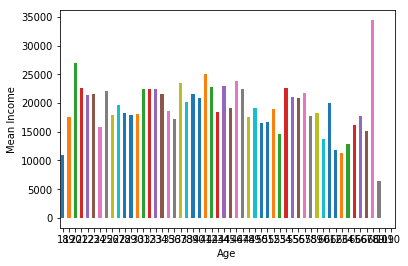

In [2]:
# the question is how well can a persons diet and substance use determine age income or body_type

income_by_age = df.groupby(df.age).income.mean()
income_by_age.plot.bar(rot=0)
plt.xlabel("Age")
plt.ylabel("Mean Income")
plt.show()


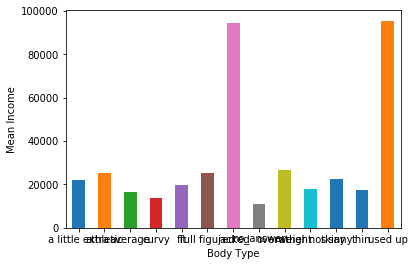

In [3]:
income_by_body_type = df.groupby(df.body_type).income.mean()
income_by_body_type.plot.bar(rot=0)
plt.xlabel("Body Type")
plt.ylabel("Mean Income")
plt.show()

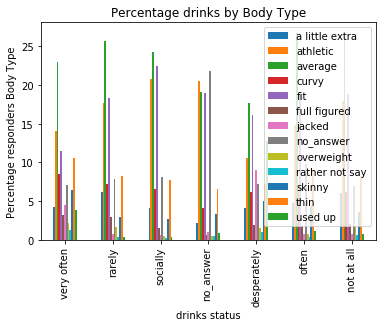

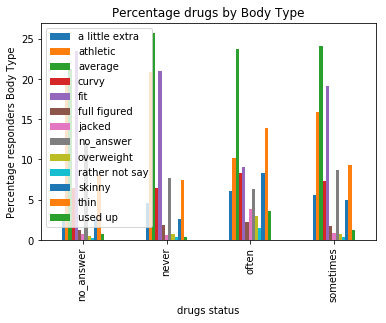

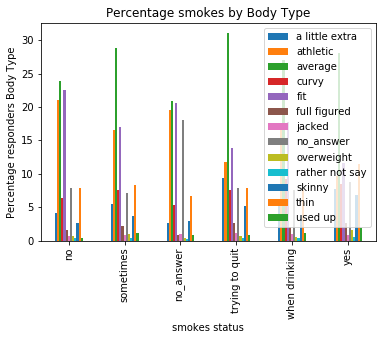

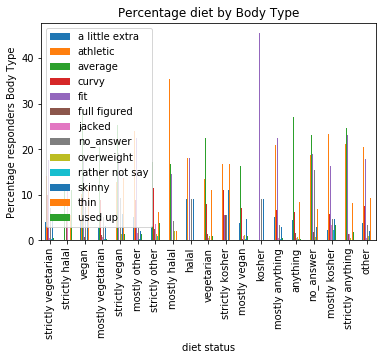

In [4]:
def percentage_body_type_by_other(other_column):
    results = {}
    for f in df.groupby(df[other_column]): 
        results[f[0]] = f[1].body_type.value_counts()

    two_way = pd.DataFrame()
    for label, value_count in results.items():
        value_count.name = label
        value_count = (value_count / value_count.sum()) * 100
        row = value_count.to_frame().transpose()
        two_way = pd.concat([two_way, row], axis=0)

    two_way.plot.bar(rot=0)
    plt.title("Percentage " + other_column + " by Body Type")
    plt.xlabel(other_column + " status")
    plt.xticks(rotation=90)
    plt.ylabel("Percentage responders Body Type")
    plt.show()

for label in ["drinks", "drugs", "smokes", "diet"]:
    percentage_body_type_by_other(label)



In [5]:
# Translate categorical feature data into numerical... 

body_type_map = {
    "no_answer": 0,
    "rather not say": 1,
    "used up": 2,
    "overweight": 3, 
    "curvy": 4,
    "full figured": 5, 
    "a little extra": 6,
    "skinny": 7,
    "thin": 8, 
    "average": 9,
    "fit": 10,
    "athletic": 11,
    "jacked": 12
}

drug_type_map = {
    "no_answer": 0,
    "never": 1,
    "sometimes": 2,
    "often": 3
}

drink_type_map = {
    "no_answer": 0,
    "not at all": 1,
    "rarely": 2,
    "socially": 3,
    "often": 4,
    "very often": 5,
    "desperately": 6
}

smoke_type_map = {
    "no_answer": 0,
    "no": 1,
    "trying to quit": 2,
    "when drinking": 3,
    "sometimes": 4,
    "yes": 5
}

diet_type_map = {
    "no_answer": 0,
    "strictly vegan": 1, 
    "vegan": 2,
    "mostly vegan": 3, 
    "strictly vegetarian": 4, 
    "vegetarian": 5, 
    "mostly vegetarian": 6, 
    "mostly anything": 7,
    "anything": 8,
    "strictly anything": 9
}

feature_data = df[["diet", "drinks", "drugs", "body_type", "smokes", "income", "age"]]

feature_data.dropna(inplace=True)

feature_data["diet_code"]  = feature_data.diet.map(diet_type_map)
feature_data["drinks_code"]  = feature_data.drinks.map(drink_type_map)
feature_data["smokes_code"]  = feature_data.smokes.map(smoke_type_map)
feature_data["drugs_code"]  = feature_data.drugs.map(drug_type_map)
feature_data["body_code"]  = feature_data.body_type.map(body_type_map)

feature_data.dropna(inplace=True)
feature_data = feature_data[feature_data.income != -1]


/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liam/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

Input data shape: (10998, 6)
Independent Variables: income, diet_code, drinks_code, smokes_code, drugs_code, body_code
Dependent Variable: age
Train Score: 0.042332739364382754
Test Score: 0.04995830280401504
[('smokes_code', -5.72685166999203), ('drinks_code', -4.541424576130044), ('drugs_code', -1.7977144151184188), ('diet_code', -1.6844946350432741), ('body_code', 0.3124906365850019), ('income', 0.25781812970865275)]


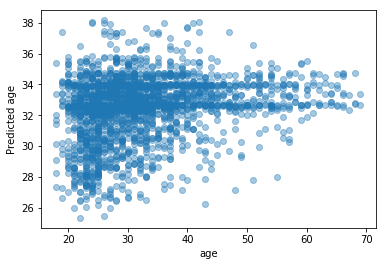

Input data shape: (10998, 6)
Independent Variables: income, age, diet_code, drinks_code, smokes_code, drugs_code
Dependent Variable: body_code
Train Score: 0.026482185591757967
Test Score: 0.03385820646163096
[('diet_code', 1.0393306924170718), ('smokes_code', -0.6534981756674716), ('drugs_code', -0.6117384721531967), ('income', 0.3357156100696346), ('age', 0.12298715195047594), ('drinks_code', 0.08646573536706577)]


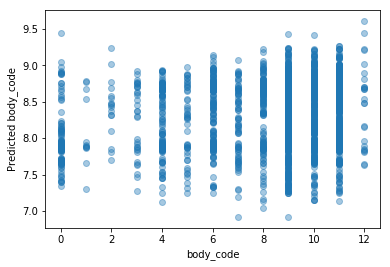

Input data shape: (10998, 6)
Independent Variables: age, diet_code, drinks_code, smokes_code, drugs_code, body_code
Dependent Variable: income
Train Score: 0.005926793041104439
Test Score: 0.0007253719333089048
[('drinks_code', 91819.10084760164), ('body_code', 18013.703950082527), ('smokes_code', -10250.336889372631), ('drugs_code', 8695.715110543219), ('diet_code', 8348.706573469757), ('age', 5444.621262288335)]


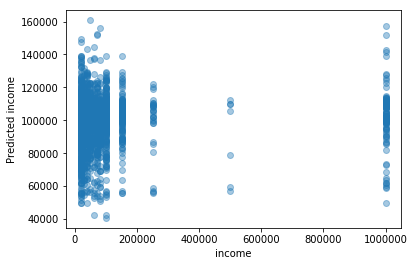

In [6]:
# Apply a preprocessed MinMaxScalar multiplelinear regression to independent and dependent features
def multiple_linear_regression(feature_data, dependent_column):
    dependent_data = feature_data[dependent_column]
    labels_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes"] + [dependent_column]
    new_feature_data = feature_data.drop(labels=labels_to_drop, axis=1)

    feature_values = new_feature_data.values
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_values_scaled = min_max_scaler.fit_transform(feature_values)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)

    X_train, X_test, y_train, y_test = train_test_split(new_feature_data, dependent_data, test_size = 0.2, random_state = 1)

    model = LinearRegression()
    model.fit(X_train,y_train)
    
    print("Input data shape: " + str(new_feature_data.shape))
    print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
    print("Dependent Variable: " + dependent_column)
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    print(sorted(list(zip(new_feature_data.columns,model.coef_)),key = lambda x: abs(x[1]),reverse=True))

    y_predicted = model.predict(X_test)

    plt.scatter(y_test, y_predicted, alpha=0.4)
    plt.xlabel(dependent_column)
    plt.ylabel('Predicted ' + dependent_column)
    plt.show()


multiple_linear_regression(feature_data, "age")
multiple_linear_regression(feature_data, "body_code")
multiple_linear_regression(feature_data, "income")


Input data shape: (10998, 6)
Independent Variables: income, diet_code, drinks_code, smokes_code, drugs_code, body_code
Dependent Variable: age
Score: 0.060991577172804234


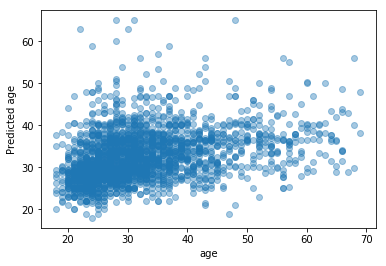

Input data shape: (10998, 6)
Independent Variables: income, age, diet_code, drinks_code, smokes_code, drugs_code
Dependent Variable: body_code
Score: -0.13684386635145618


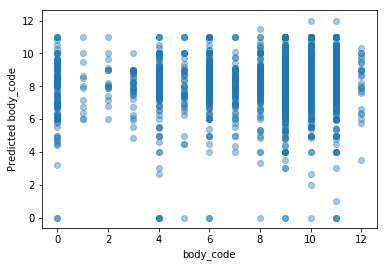

Input data shape: (10998, 6)
Independent Variables: age, diet_code, drinks_code, smokes_code, drugs_code, body_code
Dependent Variable: income
Score: -0.12408599179904178


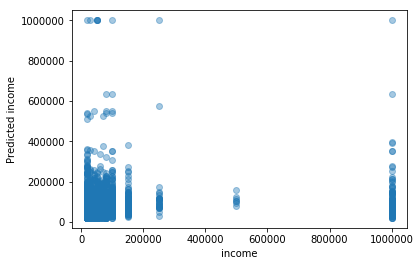

In [7]:

def k_neighboors_regression(feature_data, dependent_column):
    dependent_data = feature_data[dependent_column]
    labels_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes"] + [dependent_column]
    new_feature_data = feature_data.drop(labels=labels_to_drop, axis=1)

#     TODO which noramlization/scaling is appropriate here?
    
    feature_values_scaled = scaled_data = preprocessing.scale(new_feature_data, axis=0)

#     feature_values = new_feature_data.values
#     min_max_scaler = preprocessing.MinMaxScaler()
#     feature_values_scaled = min_max_scaler.fit_transform(feature_values)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)

    X_train, X_test, y_train, y_test = train_test_split(new_feature_data, dependent_data, test_size = 0.2, random_state = 1)

    regressor = KNeighborsRegressor(n_neighbors = 25, weights = "distance")
    regressor.fit(X_train, y_train)
    
    print("Input data shape: " + str(new_feature_data.shape))
    print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
    print("Dependent Variable: " + dependent_column)
    print('Score:', regressor.score(X_test, y_test))
    
    y_predicted = regressor.predict(X_test)

    plt.scatter(y_test, y_predicted, alpha=0.4)
    plt.xlabel(dependent_column)
    plt.ylabel('Predicted ' + dependent_column)
    plt.show()

k_neighboors_regression(feature_data, "age")
k_neighboors_regression(feature_data, "body_code")
k_neighboors_regression(feature_data, "income")


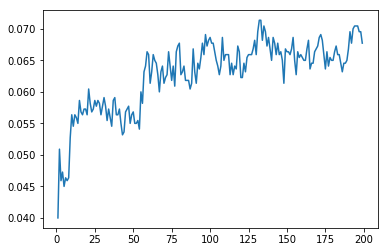

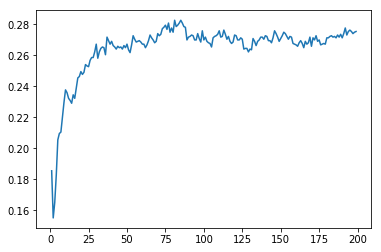

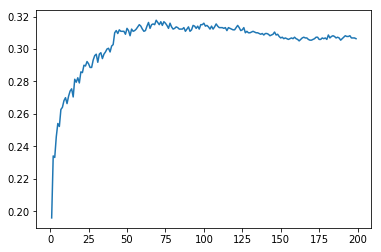

In [10]:
def k_neighboors_classifier(feature_data, dependent_column):
    labels = feature_data[dependent_column]
    cols_to_drop = ["diet", "drinks", "drugs", "body_type", "smokes"] + [dependent_column]
    new_feature_data = feature_data.drop(labels=cols_to_drop, axis=1)
    
    feature_values_scaled = scaled_data = preprocessing.scale(new_feature_data, axis=0)

    new_feature_data = pd.DataFrame(feature_values_scaled, columns=new_feature_data.columns)

    train_data, test_data, train_labels, test_labels = train_test_split(new_feature_data, labels, test_size = 0.2, random_state = 1)

    scores = []
    for k in range(1, 200):
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(train_data, train_labels)
        scores.append(classifier.score(test_data, test_labels))

    plt.plot(range(1,200), scores)
    plt.show()
    
    
#     classifier = KNeighborsClassifier(n_neighbors = 5)
#     classifier.fit(train_data, train_labels)

#     print("Input data shape: " + str(new_feature_data.shape))
#     print("Independent Variables: " + ", ".join(list(new_feature_data.columns)) )
#     print("Dependent Variable: " + dependent_column)
#     print('Score:', classifier.score(test_data, test_labels))
    
#     y_predicted = classifier.predict(test_data)

#     plt.scatter(test_labels, y_predicted, alpha=0.4)
#     plt.xlabel(dependent_column)
#     plt.ylabel('Predicted ' + dependent_column)
#     plt.show()

k_neighboors_classifier(feature_data, "age")
k_neighboors_classifier(feature_data, "body_code")
k_neighboors_classifier(feature_data, "income")